# Problem Statement - 11 
Intel Products Sentiment Analysis from Online reviews



# Introduction


The computing technology has advanced significantly with the arrival of the 14th generation Intel processors, which promise improved efficiency and performance. Understanding consumer sentiment becomes essential as these products hit the market to ensure ongoing development and preserve a competitive advantage. A thorough sentiment analysis of customer reviews for these processors is presented in this report with the goal of offering useful insights into customer perceptions and potential improvement are.

In this project we look at the quantitative and qualitative aspects of customer feedback by using data from a variety of customer reviews. This report gives a nuanced understanding of how users perceive Intel's latest processors through detailed temporal analysis, language-specific sentiment trends, and the identification of common themes in both positive and negative reviews. Finding areas of concern to address and strengths to build upon will ultimately help guide strategies to improve customer satisfaction and loyalty.

In [1]:
# Loading the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk
from nltk.corpus import words
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from googletrans import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from wordcloud import WordCloud
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import register_matplotlib_converters

In [2]:
df1 = pd.read_csv("CoreTM i9-14900K New Gaming Desktop Processor 24 (8 P-cores + 16 E-cores) with Integrated Graphics.csv")
df2 = pd.read_csv("Intel® Core™ i9-14900KS Desktop Processor 24 cores (8 P-cores + 16 E-cores).csv")
df3 = pd.read_csv("Intel® Core™ i7-14700K New Gaming Desktop Processor 20 cores (8 P-cores + 12 E-cores) with Integrated Graphics - Unlocked.csv")
df4 = pd.read_csv("Core i7-14700F Desktop Processor 20 cores (8 P-cores + 12 E-cores) up to 5.4 GHz.csv")
df5 = pd.read_csv("Core i5-14500 Desktop Processor 14 cores (6 P-cores + 8 E-cores) up to 5.0 GHz.csv")
df6 = pd.read_csv("Intel Core i5-14400F Desktop Processor 10 cores (6 P-cores + 4 E-cores) up to 4.7 GHz.csv")
df7 = pd.read_csv("Intel Core i3-14100 Desktop Processor 4 cores (4 P-cores + 0 E-cores) up to 4.7 GHz.csv")
df8 = pd.read_csv("Core i3-14100F Desktop Processor 4 cores (4 P-cores + 0 E-cores).csv")

In [3]:
#Loading the combined dataframe
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df

,id,profileName,text,date,title,rating,images,helpful,variant:pattern,variant:style,variant:,variant:pattern name,variant:style name
0,R502RF7DUUKBT,Chris H,I decided the difference between the i7 and th...,"Reviewed in the United States on May 31, 2024",i7-14700K is a significant improvement from i9...,5.0 out of 5 stars,https://m.media-amazon.com/images/I/715ewfylAp...,2,Processor,Core™ i7-14700K,NaN,NaN,NaN
1,R2FLCRTOTFGFTM,Deven,This professional CPU isn't designed for the a...,"Reviewed in the United States on April 4, 2024",6.2GHZ 8200mts cl38 Daily Driver.,5.0 out of 5 stars,https://m.media-amazon.com/images/I/51RGUkw89i...,17,Processor,Core™ i9-14900K,NaN,NaN,NaN
2,R29AWRHLI4MVWV,Austin,A lot of people are upset with the 14900k beca...,"Reviewed in the United States on December 7, 2023",It's the perfect fit for this monster PC I jus...,5.0 out of 5 stars,https://m.media-amazon.com/images/I/71HrkhFrpT...,8,Processor,Core™ i9-14900K,NaN,NaN,NaN
3,RPJDOZU4NH0XO,JZ the reviewer,I'm not going to go over the same performance ...,"Reviewed in the United States on February 11, ...",IF YOU WANT THE AIR COOLED OPTION,5.0 out of 5 stars,https://m.media-amazon.com/images/I/7125D4RdR9...,14,Processor,Core™ i9-14900K,NaN,NaN,NaN
4,R2GZ1S88XY5D4X,Cole P.,Works great in new build! Only slight issue is...,"Reviewed in the United States on June 20, 2024",Super Powerful CPU,5.0 out of 5 stars,https://m.media-amazon.com/images/I/81xEnJ+7l+...,0,Processor,Core™ i9-14900KF,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,R3RWY8TZ8IXZEF,J. Mershon,Toms Hardware recommended this processor so I ...,Reviewed in the United States on 9 June 2024,Good price and reliable for gaming,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor
3,R3PUMAI08D2YRM,Leroy Dodd,The processor can in fine. I thought I was bei...,Reviewed in the United States on 14 April 2024,Big dummy,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor
4,R2KE5N6IR4SQBJ,cathyesq,My son recently upgraded his computer and we b...,Reviewed in the United States on 26 March 2024,Son says this is great,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor
5,R3JVZTXU8DXMZP,Jon281,A friend told me he was running Tekken 8 on a ...,Reviewed in the United States on 20 February 2024,Cost/benefit ratio better than a comparable AMD,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor


In [4]:
# Creating a function to extract and convert the date column
def extract_date(date_str):
    # Extract the date part from the string
    date_part = date_str.split(' on ')[-1]
    # Convert the date part to datetime
    return pd.to_datetime(date_part)

# Apply the function to the date column
df['date'] = df['date'].apply(extract_date)

# Now we can use the date column for further analysis
df

,id,profileName,text,date,title,rating,images,helpful,variant:pattern,variant:style,variant:,variant:pattern name,variant:style name
0,R502RF7DUUKBT,Chris H,I decided the difference between the i7 and th...,2024-05-31,i7-14700K is a significant improvement from i9...,5.0 out of 5 stars,https://m.media-amazon.com/images/I/715ewfylAp...,2,Processor,Core™ i7-14700K,NaN,NaN,NaN
1,R2FLCRTOTFGFTM,Deven,This professional CPU isn't designed for the a...,2024-04-04,6.2GHZ 8200mts cl38 Daily Driver.,5.0 out of 5 stars,https://m.media-amazon.com/images/I/51RGUkw89i...,17,Processor,Core™ i9-14900K,NaN,NaN,NaN
2,R29AWRHLI4MVWV,Austin,A lot of people are upset with the 14900k beca...,2023-12-07,It's the perfect fit for this monster PC I jus...,5.0 out of 5 stars,https://m.media-amazon.com/images/I/71HrkhFrpT...,8,Processor,Core™ i9-14900K,NaN,NaN,NaN
3,RPJDOZU4NH0XO,JZ the reviewer,I'm not going to go over the same performance ...,2024-02-11,IF YOU WANT THE AIR COOLED OPTION,5.0 out of 5 stars,https://m.media-amazon.com/images/I/7125D4RdR9...,14,Processor,Core™ i9-14900K,NaN,NaN,NaN
4,R2GZ1S88XY5D4X,Cole P.,Works great in new build! Only slight issue is...,2024-06-20,Super Powerful CPU,5.0 out of 5 stars,https://m.media-amazon.com/images/I/81xEnJ+7l+...,0,Processor,Core™ i9-14900KF,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,R3RWY8TZ8IXZEF,J. Mershon,Toms Hardware recommended this processor so I ...,2024-06-09,Good price and reliable for gaming,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor
3,R3PUMAI08D2YRM,Leroy Dodd,The processor can in fine. I thought I was bei...,2024-04-14,Big dummy,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor
4,R2KE5N6IR4SQBJ,cathyesq,My son recently upgraded his computer and we b...,2024-03-26,Son says this is great,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor
5,R3JVZTXU8DXMZP,Jon281,A friend told me he was running Tekken 8 on a ...,2024-02-20,Cost/benefit ratio better than a comparable AMD,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor


In [5]:
# Set of English words
english_words = set(words.words())

def preprocess_text(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    return text.strip()

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except LangDetectException:
        return 'unknown'

def translate_to_english(text, source_lang):
    translator = Translator()
    try:
        translated = translator.translate(text, src=source_lang, dest='en')
        return translated.text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

def is_english(text):
    words_in_text = set(text.split())
    if not words_in_text:  # Check if the set is empty
        return False
    english_words_in_text = words_in_text & english_words
    return len(english_words_in_text) / len(words_in_text) > 0.5  # Threshold to determine if text is in English

def analyze_text(text):
    cleaned_text = preprocess_text(text)

    if is_english(cleaned_text):
        language = 'en'
        translated_text = text  # No need to translate if already English
    else:
        language = detect_language(text)
        if language == 'unknown':
            translated_text = None
        else:
            translated_text = translate_to_english(text, language)

    # Ensure translated_text is a string to avoid TypeError
    translated_text = translated_text if translated_text is not None else ""

    blob = TextBlob(translated_text)
    sentiment = blob.sentiment.polarity

    return pd.Series([language, sentiment, translated_text])

# Apply the function to create new columns
df[['language', 'sentiment', 'translated_text']] = df['text'].apply(analyze_text)

# Separate English and non-English texts
df_english = df[df['language'] == 'en']
df_non_english = df[df['language'] != 'en']

# Print summary
print(df['language'].value_counts())
print("\nSample of English texts:")
print(df_english[['text', 'sentiment']].head())
print("\nSample of non-English texts:")
print(df_non_english[['text', 'sentiment', 'language', 'translated_text']].head())

# Calculating average sentiment by language
avg_sentiment = df.groupby('language')['sentiment'].mean().sort_values(ascending=False)
print("\nAverage sentiment by language:")
print(avg_sentiment)

language
en    424
es     31
ja     21
de     11
it      5
fr      4
ar      2
ko      1
cy      1
af      1
ro      1
Name: count, dtype: int64

Sample of English texts:
                                                text  sentiment
0  I decided the difference between the i7 and th...  -0.033514
1  This professional CPU isn't designed for the a...   0.116510
2  A lot of people are upset with the 14900k beca...   0.176159
3  I'm not going to go over the same performance ...   0.025197
4  Works great in new build! Only slight issue is...   0.162446

Sample of non-English texts:
                                                 text  sentiment language  \
12  Bueno vengo cambiando de una 12400F a 14600KF ...   0.386548       es   
57  por la compra del procesador decía que regalab...   0.300000       es   
60  no calineta mucho pero utilizo un radiador 360...   0.200000       es   
62  Excelente procesador super rápido lo recomiend...   0.457576       es   
77  Perfecto para las tareas m

In [6]:
# Function to clean text
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['translated_text'].apply(clean_text)

# Display the cleaned text
print(df[['translated_text', 'cleaned_text']].head())
df

                                     translated_text  \
0  I decided the difference between the i7 and th...   
1  This professional CPU isn't designed for the a...   
2  A lot of people are upset with the 14900k beca...   
3  I'm not going to go over the same performance ...   
4  Works great in new build! Only slight issue is...   

                                        cleaned_text  
0  decided difference i7 i9 didnt justify price d...  
1  professional cpu isnt designed average user ho...  
2  lot people upset 14900k minimal performance le...  
3  im going go performance reviews others done ye...  
4  works great new build slight issue felt like w...  


,id,profileName,text,date,title,rating,images,helpful,variant:pattern,variant:style,variant:,variant:pattern name,variant:style name,language,sentiment,translated_text,cleaned_text
0,R502RF7DUUKBT,Chris H,I decided the difference between the i7 and th...,2024-05-31,i7-14700K is a significant improvement from i9...,5.0 out of 5 stars,https://m.media-amazon.com/images/I/715ewfylAp...,2,Processor,Core™ i7-14700K,NaN,NaN,NaN,en,-0.033514,I decided the difference between the i7 and th...,decided difference i7 i9 didnt justify price d...
1,R2FLCRTOTFGFTM,Deven,This professional CPU isn't designed for the a...,2024-04-04,6.2GHZ 8200mts cl38 Daily Driver.,5.0 out of 5 stars,https://m.media-amazon.com/images/I/51RGUkw89i...,17,Processor,Core™ i9-14900K,NaN,NaN,NaN,en,0.116510,This professional CPU isn't designed for the a...,professional cpu isnt designed average user ho...
2,R29AWRHLI4MVWV,Austin,A lot of people are upset with the 14900k beca...,2023-12-07,It's the perfect fit for this monster PC I jus...,5.0 out of 5 stars,https://m.media-amazon.com/images/I/71HrkhFrpT...,8,Processor,Core™ i9-14900K,NaN,NaN,NaN,en,0.176159,A lot of people are upset with the 14900k beca...,lot people upset 14900k minimal performance le...
3,RPJDOZU4NH0XO,JZ the reviewer,I'm not going to go over the same performance ...,2024-02-11,IF YOU WANT THE AIR COOLED OPTION,5.0 out of 5 stars,https://m.media-amazon.com/images/I/7125D4RdR9...,14,Processor,Core™ i9-14900K,NaN,NaN,NaN,en,0.025197,I'm not going to go over the same performance ...,im going go performance reviews others done ye...
4,R2GZ1S88XY5D4X,Cole P.,Works great in new build! Only slight issue is...,2024-06-20,Super Powerful CPU,5.0 out of 5 stars,https://m.media-amazon.com/images/I/81xEnJ+7l+...,0,Processor,Core™ i9-14900KF,NaN,NaN,NaN,en,0.162446,Works great in new build! Only slight issue is...,works great new build slight issue felt like w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,R3RWY8TZ8IXZEF,J. Mershon,Toms Hardware recommended this processor so I ...,2024-06-09,Good price and reliable for gaming,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor,en,-0.750000,Toms Hardware recommended this processor so I ...,toms hardware recommended processor gave shot ...
3,R3PUMAI08D2YRM,Leroy Dodd,The processor can in fine. I thought I was bei...,2024-04-14,Big dummy,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor,en,0.161565,The processor can in fine. I thought I was bei...,processor fine thought smart buying newest 14t...
4,R2KE5N6IR4SQBJ,cathyesq,My son recently upgraded his computer and we b...,2024-03-26,Son says this is great,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor,en,0.575000,My son recently upgraded his computer and we b...,son recently upgraded computer bought says wor...
5,R3JVZTXU8DXMZP,Jon281,A friend told me he was running Tekken 8 on a ...,2024-02-20,Cost/benefit ratio better than a comparable AMD,5.0 out of 5 stars,NaN,0,NaN,NaN,NaN,NaN,Computer Processor,en,0.158333,A friend told me he was running Tekken 8 on a ...,friend told running tekken 8 12th gen i3 enoug...


In [7]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Transform the cleaned text into TF-IDF features
X = vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF features
print(tfidf_df.head())

    10       100      1000      100c  10900k   10980xe   11        12  120mm  \
0  0.0  0.000000  0.000000  0.000000     0.0  0.000000  0.0  0.085474    0.0   
1  0.0  0.000000  0.000000  0.000000     0.0  0.000000  0.0  0.000000    0.0   
2  0.0  0.000000  0.000000  0.000000     0.0  0.000000  0.0  0.000000    0.0   
3  0.0  0.076302  0.045241  0.037631     0.0  0.210035  0.0  0.046564    0.0   
4  0.0  0.000000  0.000000  0.000000     0.0  0.000000  0.0  0.000000    0.0   

   12700k  ...  xmp  xtu     years       yes  yet     youll     youre  \
0     0.0  ...  0.0  0.0  0.061220  0.000000  0.0  0.000000  0.000000   
1     0.0  ...  0.0  0.0  0.045142  0.000000  0.0  0.000000  0.044341   
2     0.0  ...  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.060430   
3     0.0  ...  0.0  0.0  0.000000  0.040618  0.0  0.074281  0.065519   
4     0.0  ...  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.000000   

    youtube     z690      z790  
0  0.000000  0.07593  0.059118  
1  0.061236  0

We utilized the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to transform text data into a numerical format suitable for analysis. By initializing the TfidfVectorizer with a parameter to limit the features to the 1000 most important words, we efficiently captured the key terms. The cleaned text from our DataFrame was transformed into a TF-IDF matrix, which calculates the importance of each term in the context of its document and across all documents. This matrix was then converted into a DataFrame, where rows represent documents and columns represent terms, with the values indicating the TF-IDF scores. Displaying the first five rows of this DataFrame provided a clear view of the most relevant terms and their significance within the documents. For instance, in the first document, the term "12" had a TF-IDF score of 0.085147, indicating its relative importance within that document compared to its frequency in the entire dataset.

In [8]:
# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply the function to the cleaned text
df['sentiment_scores'] = df['cleaned_text'].apply(get_sentiment_scores)

# Split the sentiment scores into separate columns
df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)

# Display the results
print(df[['cleaned_text', 'neg', 'neu', 'pos', 'compound']].head())

                                        cleaned_text    neg    neu    pos  \
0  decided difference i7 i9 didnt justify price d...  0.095  0.857  0.047   
1  professional cpu isnt designed average user ho...  0.048  0.791  0.161   
2  lot people upset 14900k minimal performance le...  0.051  0.755  0.194   
3  im going go performance reviews others done ye...  0.050  0.838  0.112   
4  works great new build slight issue felt like w...  0.000  0.634  0.366   

   compound  
0   -0.9081  
1    0.9948  
2    0.9727  
3    0.9794  
4    0.8495  


We analyzed customer reviews using sentiment analysis to quantify the emotional tone of the text. The reviews were cleaned and transformed into numerical sentiment scores using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. The resulting DataFrame includes columns for negative (neg), neutral (neu), positive (pos), and compound (compound) sentiment scores. Each score represents the proportion of the text falling into these categories, with the compound score being a normalized sum of the other scores ranging from -1 (most negative) to 1 (most positive). For example, the first review, "decided difference i7 i9 didnt justify price difference," received a negative score of 0.095, a neutral score of 0.857, a positive score of 0.047, and a compound score of -0.9081, indicating a predominantly neutral sentiment with an overall negative tone.

In [9]:
# Display basic statistics of sentiment scores
print(df[['neg', 'neu', 'pos', 'compound']].describe())

              neg         neu         pos    compound
count  502.000000  502.000000  502.000000  502.000000
mean     0.065610    0.705964    0.228394    0.381029
std      0.083437    0.192194    0.204145    0.533381
min      0.000000    0.000000    0.000000   -0.966100
25%      0.000000    0.620000    0.094000    0.000000
50%      0.041000    0.726000    0.194000    0.537750
75%      0.111000    0.817000    0.320500    0.839200
max      0.453000    1.000000    1.000000    0.994800


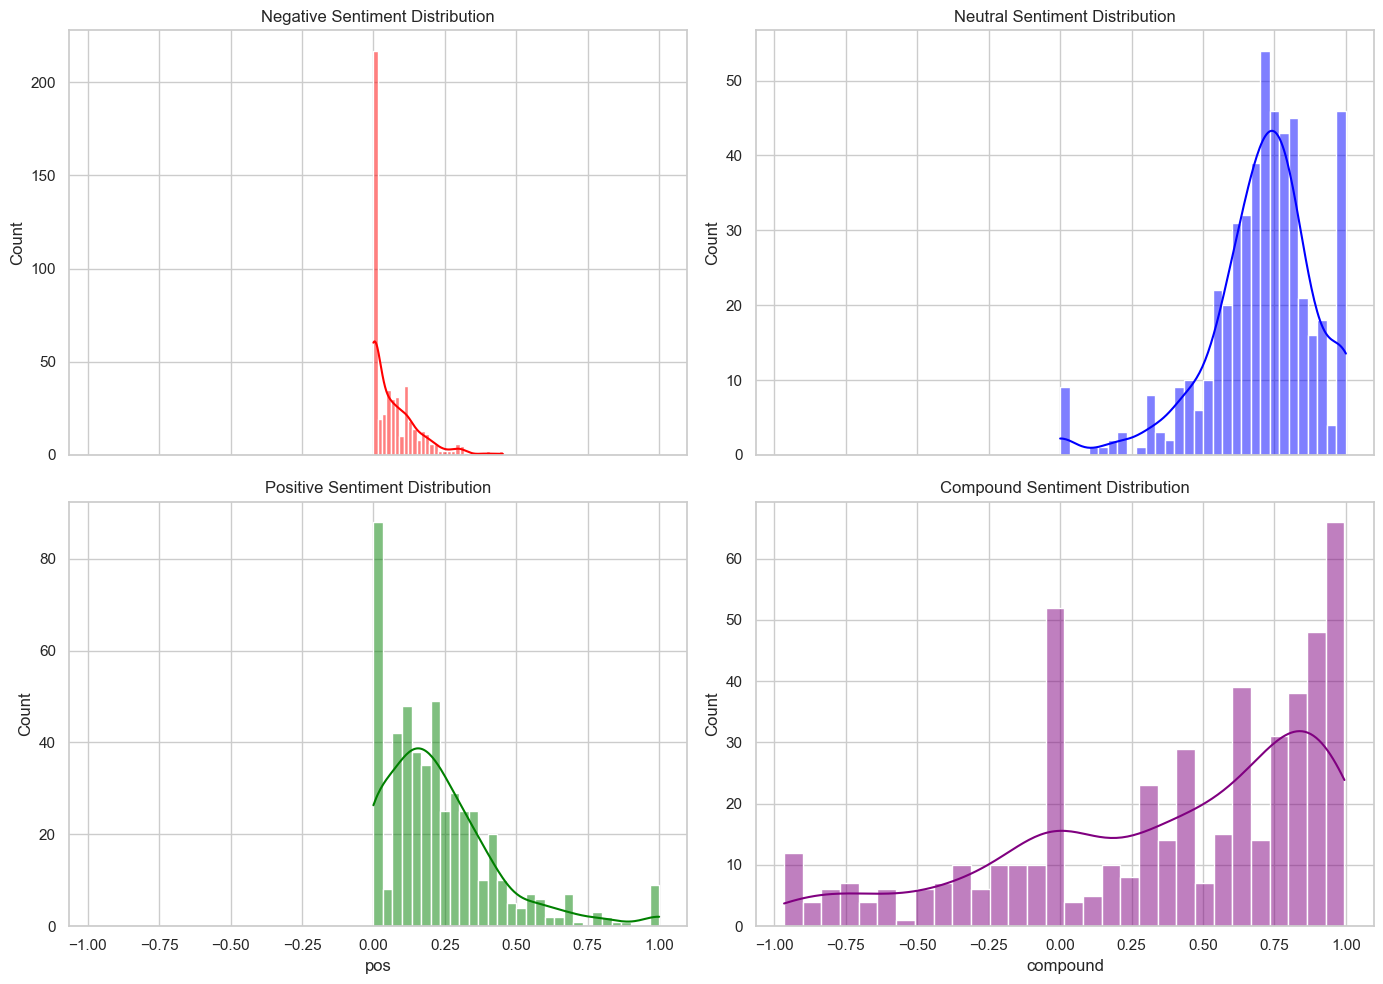

In [10]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Plot negative sentiment scores
sns.histplot(df['neg'], bins=30, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title('Negative Sentiment Distribution')

# Plot neutral sentiment scores
sns.histplot(df['neu'], bins=30, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Neutral Sentiment Distribution')

# Plot positive sentiment scores
sns.histplot(df['pos'], bins=30, kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Positive Sentiment Distribution')

# Plot compound sentiment scores
sns.histplot(df['compound'], bins=30, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Compound Sentiment Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

Negative Sentiment Distribution:

Most of the reviews have a very low negative sentiment score, close to zero.
There is a sharp drop-off as the score increases, indicating that very few reviews are predominantly negative.

Neutral Sentiment Distribution:

The neutral sentiment scores are skewed towards the higher end, suggesting that many reviews are considered more neutral.
This distribution suggests that many reviews have balanced sentiments, neither strongly positive nor negative.

Positive Sentiment Distribution:

The positive sentiment scores show a peak close to zero but there are significant numbers of reviews with higher positive sentiment.
The tail extends towards 1.0, indicating that some reviews are highly positive.

Compound Sentiment Distribution:

The compound sentiment scores also show a skew towards the positive end.
There is a significant number of reviews with high compound scores, indicating an overall positive sentiment in the reviews.

In [11]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorization function to the compound scores
df['sentiment_category'] = df['compound'].apply(categorize_sentiment)

# Display the sentiment category counts
print(df['sentiment_category'].value_counts())

sentiment_category
positive    350
negative     99
neutral      53
Name: count, dtype: int64


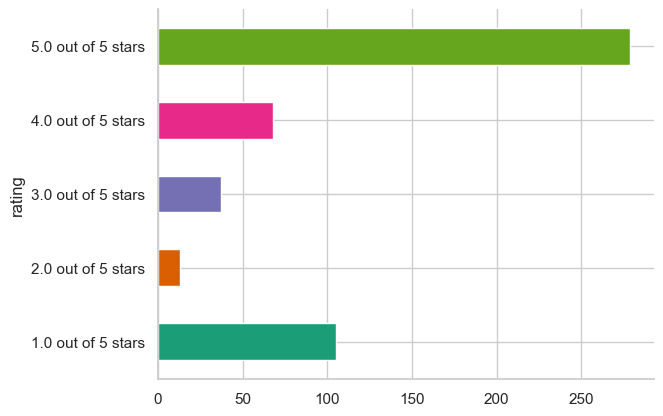

In [12]:
# Plotting a bar graph of the total count of rating

df.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

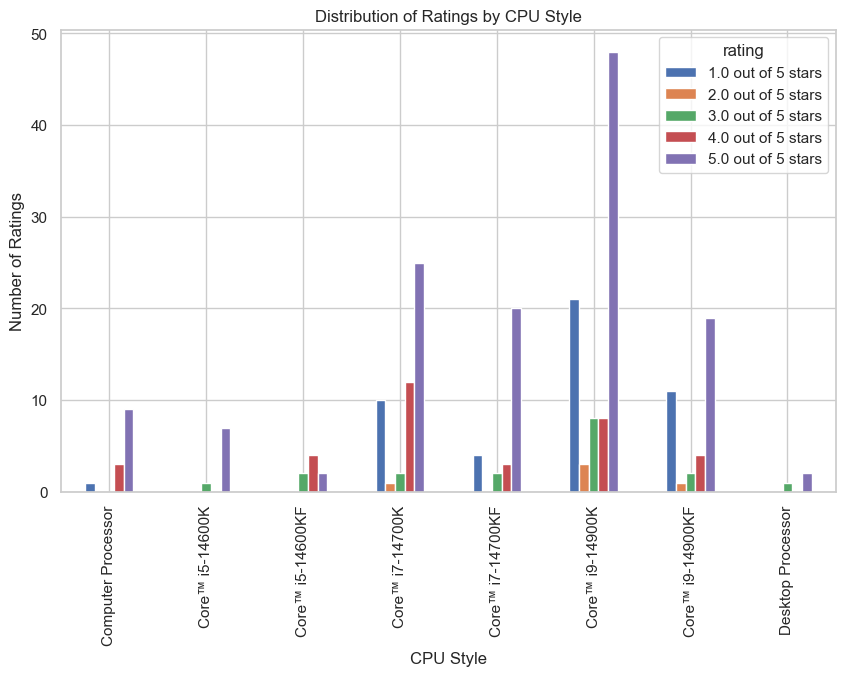

In [13]:
# Distribution of Ratings by CPU Style

rating_counts = df.groupby(['variant:style', 'rating'])['id'].count().unstack()

rating_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('CPU Style')
plt.ylabel('Number of Ratings')
_ = plt.title('Distribution of Ratings by CPU Style')

Note: Here, the computer processor is the 14th gen i3 processor.

C:\Users\admin\AppData\Local\Temp\ipykernel_9504\1148432448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette=['red', 'blue', 'green'])


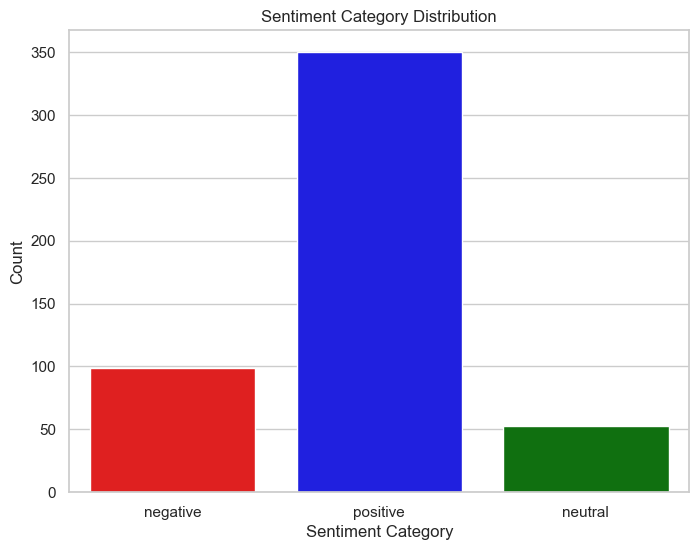

In [14]:
# Create a bar plot for sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette=['red', 'blue', 'green'])
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [15]:
#Topic Modeling with LDA
# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_data = vectorizer.fit_transform(df['cleaned_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_data)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic #0
['amd', 'like', 'gpu', 'issues', 'good', 'ram', 'new', 'processor', 'intel', 'cpu']
Topic #1
['im', 'aio', 'cooling', 'power', 'cooler', 'good', 'gaming', 'processor', 'performance', 'cpu']
Topic #2
['thermal', 'fan', 'cooling', 'pc', 'temps', '13900k', '14900k', 'cooler', 'intel', 'cpu']
Topic #3
['13th', 'good', 'upgrade', 'generation', 'issues', 'motherboard', 'gen', 'performance', 'intel', 'cpu']
Topic #4
['bios', 'power', 'cores', 'cooler', 'great', 'run', 'processor', 'new', 'intel', 'cpu']


We performed topic modeling on customer reviews using Latent Dirichlet Allocation (LDA) to uncover the underlying themes in the text data. The reviews were vectorized using the CountVectorizer, which transformed the text into a matrix of token counts, excluding common English stop words and considering terms that appeared in at least 2 documents but no more than 95% of the documents. The LDA model was then fit to this vectorized data, with the number of topics set to 5. The topics identified by the model were as follows:

Topic #0: This topic centered around terms such as 'cooler', 'use', 'processor', 'cores', 'new', 'thing', 'performance', 'run', 'intel', and 'cpu', suggesting a focus on general usage and performance of processors and coolers.

Topic #1: Key terms included 'air', 'i9', 'fast', 'water', 'runs', 'cooling', 'good', 'performance', 'cpu', and 'cooler', indicating a discussion on cooling solutions and the performance of high-end CPUs like the i9.

Topic #2: Words such as 'motherboard', 'good', 'thermal', 'core', 'asus', 'new', 'bios', 'cpu', 'processor', and 'intel' were prominent, pointing to topics related to motherboards, thermal management, and specific brands like Asus.

Topic #3: This topic featured terms like 'ram', 'issue', 'power', 'new', 'gpu', 'great', 'im', 'intel', 'issues', and 'cpu', highlighting issues and components such as RAM, power, and GPUs.

Topic #4: Dominated by terms like 'good', 'cpu', 'upgrade', 'power', 'cooling', 'dont', 'intel', 'processor', 'performance', and 'gaming', this topic emphasized upgrades, performance, and gaming-related discussions.

By examining these topics, we can gain insights into the primary concerns and interests of customers regarding Intel processors and related components.

In [16]:
def get_top_words(text_series, n=10):
    stop_words = set(stopwords.words('english'))
    words = ' '.join(text_series).lower().split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(words).most_common(n)

# Filter positive and negative reviews based on compound sentiment score
positive_reviews = df[df['compound'] > 0]['cleaned_text']
neutral_reviews = df[df['compound'] == 0]['cleaned_text']
negative_reviews = df[df['compound'] < 0]['cleaned_text']

print("Top words in positive reviews:", get_top_words(positive_reviews))
print("")
print("Top words in neutral reviews:", get_top_words(neutral_reviews))
print("")
print("Top words in negative reviews:", get_top_words(negative_reviews))

Top words in positive reviews: [('cpu', 275), ('intel', 152), ('performance', 136), ('gaming', 118), ('cooler', 115), ('good', 115), ('processor', 113), ('power', 89), ('new', 86), ('get', 83)]

Top words in neutral reviews: [('generation', 11), ('cpu', 10), ('core', 9), ('new', 8), ('14th', 7), ('cooler', 6), ('works', 5), ('box', 5), ('issues', 4), ('running', 4)]

Top words in negative reviews: [('cpu', 98), ('intel', 80), ('processor', 47), ('even', 31), ('issues', 29), ('get', 28), ('dont', 25), ('motherboard', 23), ('still', 22), ('run', 21)]


we analyzed the most frequently used words in customer reviews by categorizing them based on sentiment scores. The sentiment scores were obtained using the VADER sentiment analysis tool, which provided a compound score for each review. Reviews were classified as positive, neutral, or negative based on their compound scores. We then extracted the top 10 most common words from each category of reviews, excluding common stop words and words with less than three characters.

Top Words in Positive Reviews: The most frequently used words in positive reviews included 'cpu' (275 occurrences), 'intel' (152), 'performance' (136), 'gaming' (118), 'cooler' (115), 'good' (115), 'processor' (113), 'power' (89), 'new' (86), and 'get' (83). This indicates that positive reviews often discuss aspects like CPU performance, gaming, cooling solutions, and overall satisfaction with Intel products.

Top Words in Neutral Reviews: In neutral reviews, the top words were 'generation' (12 occurrences), 'cpu' (10), 'core' (9), 'new' (8), '14th' (7), 'cooler' (6), 'works' (5), 'box' (5), 'issues' (4), and 'running' (4). Neutral reviews seem to focus on factual descriptions of CPU generations, cores, and new products, along with mentions of cooling and performance.

Top Words in Negative Reviews: The most common words in negative reviews were 'cpu' (98 occurrences), 'intel' (80), 'processor' (47), 'even' (31), 'issues' (29), 'get' (28), 'dont' (25), 'motherboard' (23), 'still' (22), and 'run' (21). Negative reviews frequently highlight problems with CPUs, issues with Intel processors, and dissatisfaction with getting the products to work as expected.

This analysis provides a clear understanding of the key terms and themes prevalent in positive, neutral, and negative customer reviews, helping to identify areas of satisfaction and concern among customers.

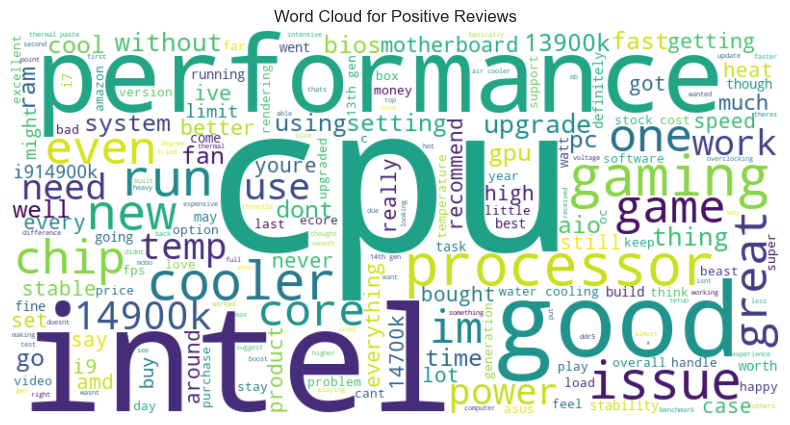

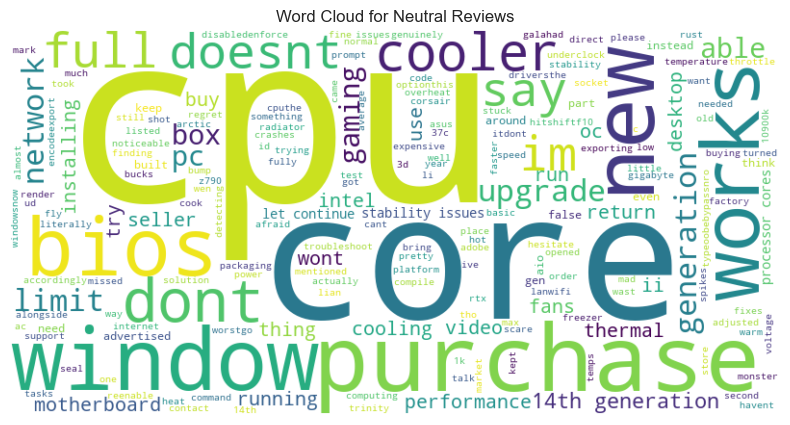

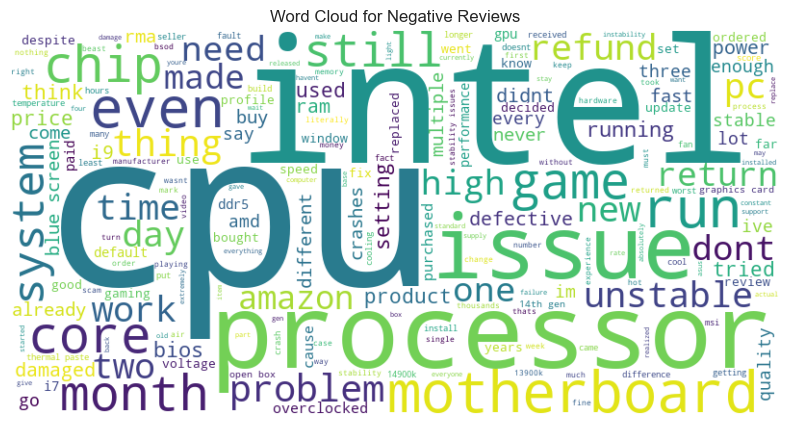

In [17]:
#Word Cloud for Positive Reviews.
positive_reviews = df[df['sentiment_category'] == 'positive']
text = ' '.join(positive_reviews['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

#Word Cloud for Neutral Reviews.
neutral_reviews = df[df['sentiment_category'] == 'neutral']
text = ' '.join(neutral_reviews['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews')
plt.show()

#Word Cloud for Negative Reviews.
negative_reviews = df[df['sentiment_category'] == 'negative']
text = ' '.join(negative_reviews['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

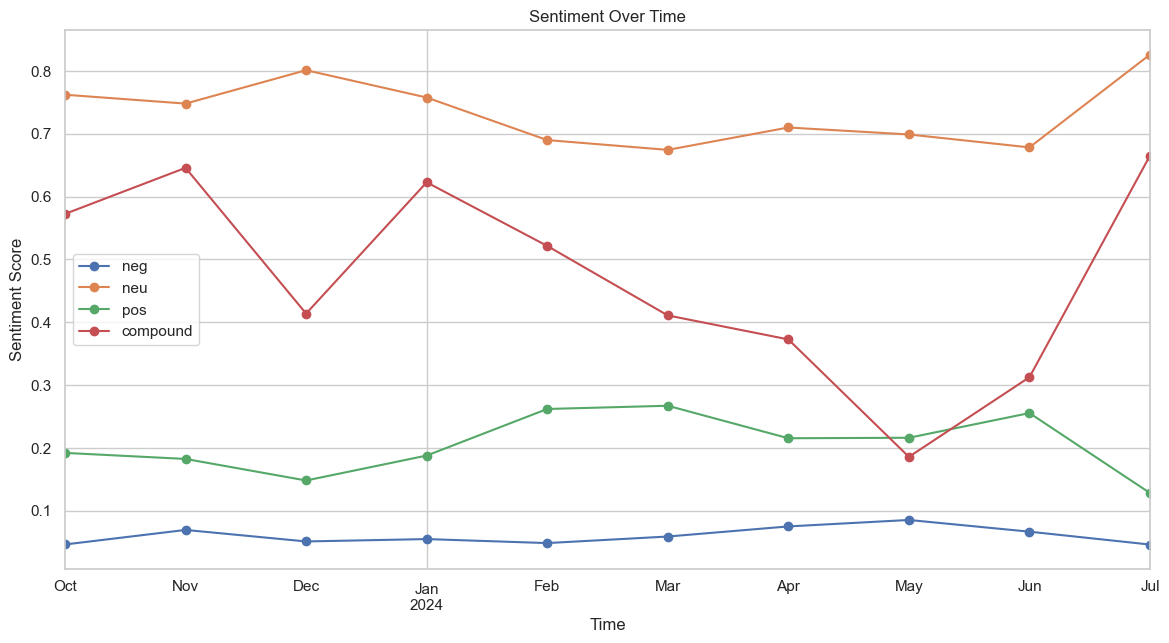

In [18]:
# Plotting sentiment over Time (10th October - 1st July 2024)
# Ensure 'date' column is datetime and drop NaT values
df['date'] = pd.to_datetime(df['date'])

# Select only the numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number']).columns

# Group by month and compute mean for numeric columns
sentiment_over_time = df.groupby(df['date'].dt.to_period('M'))[numeric_cols].mean()

# Plot the sentiment scores over time
sentiment_over_time[['neg', 'neu', 'pos', 'compound']].plot(figsize=(14, 7), marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.show()

The sentiment analysis over time depicted in the provided graph, indicates a relatively stable sentiment distribution over time, with neutral sentiment (neu) consistently scoring the highest, followed by positive sentiment (pos), compound sentiment (compound), and negative sentiment (neg). Notably, there is a significant spike in compound sentiment in July 2024, suggesting a recent surge in overall sentiment, likely driven by an increase in positive reviews. Negative sentiment remains low and stable throughout the period, indicating minimal adverse feedback. Overall, the data suggest that the sentiment around the 14th generation Intel processors has been predominantly neutral to positive, with a marked improvement in recent months.

C:\Users\admin\AppData\Local\Temp\ipykernel_9504\1200261914.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sentiment = df['compound'].resample('D').mean().fillna(method='ffill')


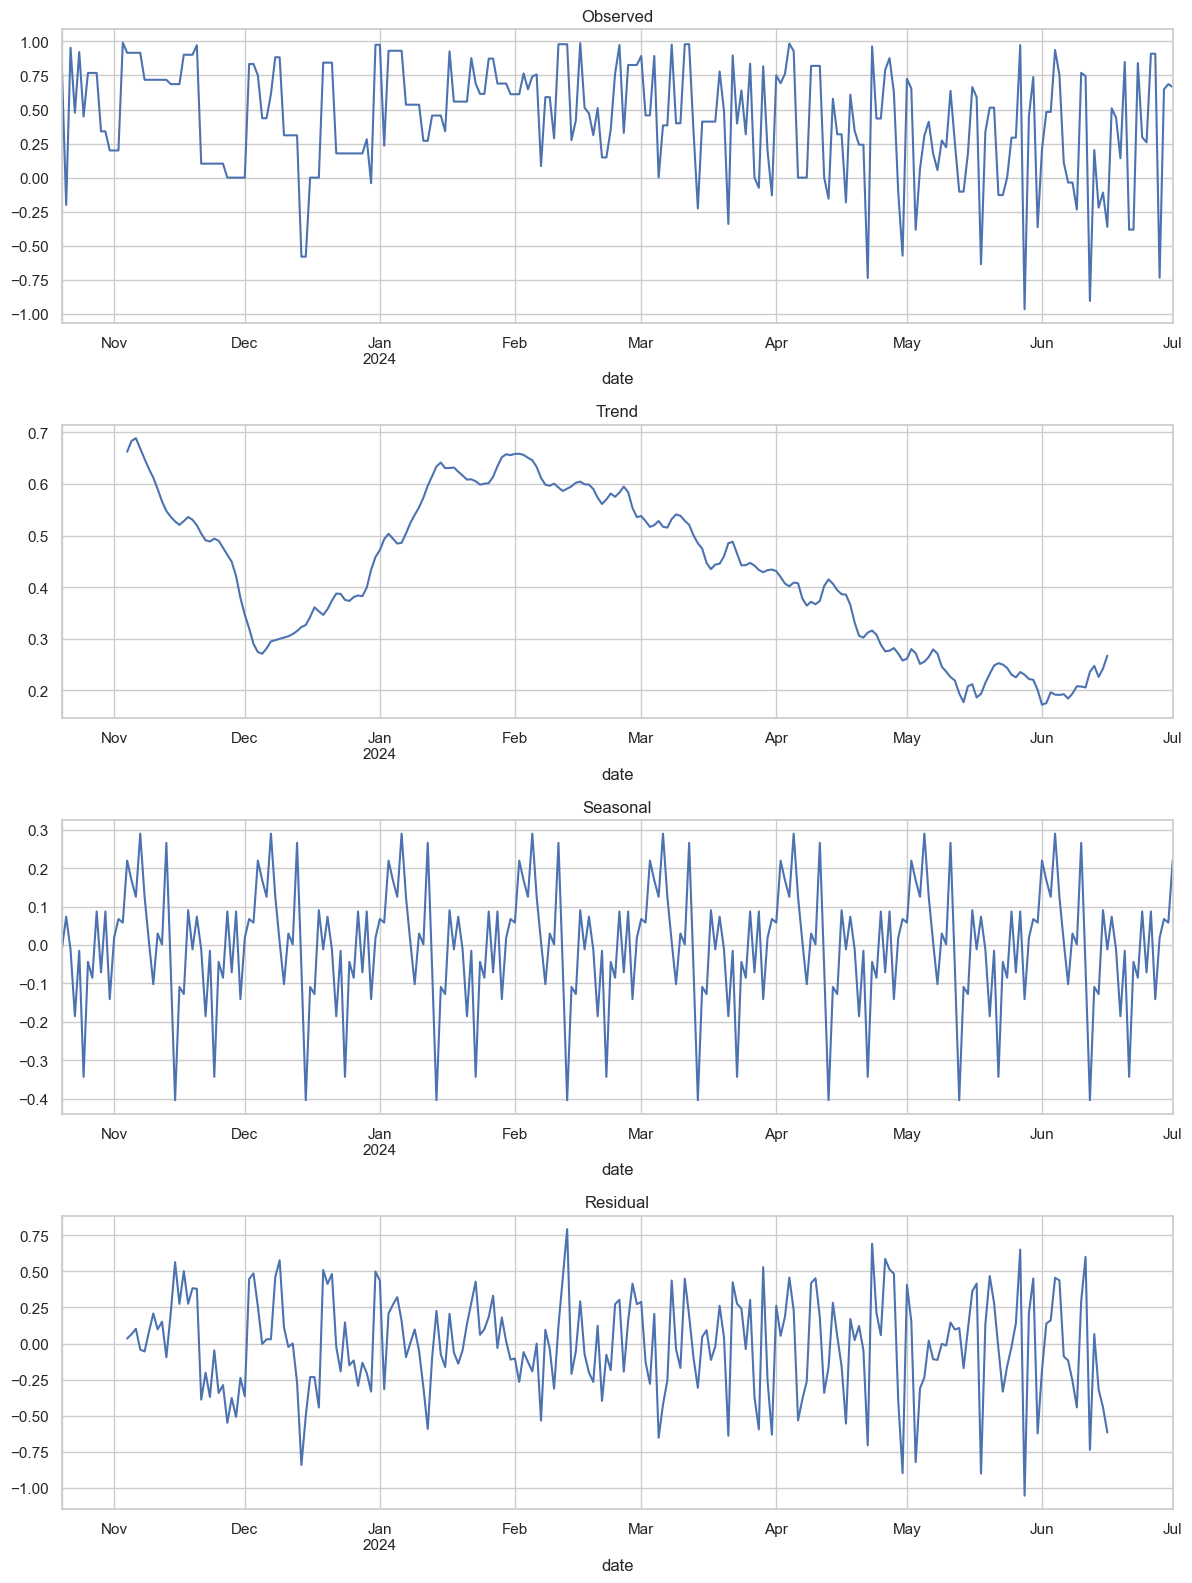

In [19]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

daily_sentiment = df['compound'].resample('D').mean().fillna(method='ffill')

result = seasonal_decompose(daily_sentiment, model='additive', period=30)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

The seasonal decomposition of the daily sentiment data reveals a clear recurring pattern, highlighting cyclical trends in sentiment. The seasonal component, as shown in the attached plot, demonstrates regular fluctuations in sentiment over the analyzed period. The observed, trend, and residual plots further elucidate the underlying patterns and variations in sentiment.

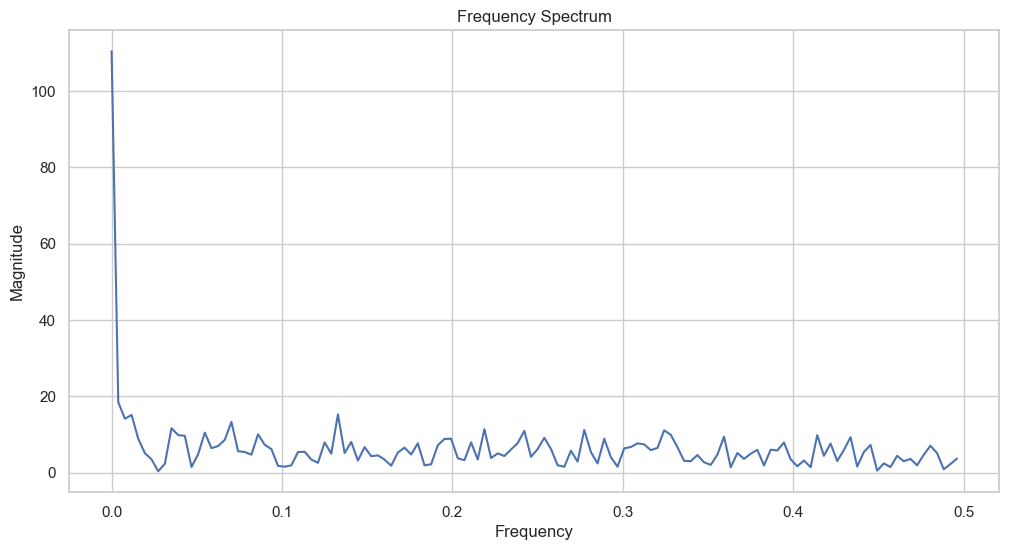

In [20]:
# Perform FFT
fft_result = fft(daily_sentiment.values)
frequencies = np.fft.fftfreq(len(daily_sentiment), d=1)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

The frequency spectrum analysis of your sentiment data reveals a dominant low-frequency component, evidenced by a prominent spike near zero frequency, indicating strong seasonal or long-term trends. This is followed by a rapid decay, highlighting the significance of these patterns. The spectrum then shows consistent, low-amplitude oscillations across higher frequencies, suggesting the presence of shorter-term sentiment fluctuations or noise. The absence of clear periodic patterns in these higher frequencies points to complex, overlapping influences on sentiment rather than simple, regular cycles. Overall, this spectrum confirms your observed seasonal patterns while also revealing the nuanced structure of sentiment variations across different time scales, providing a foundation for more targeted analysis and potential filtering approaches in your sentiment study.

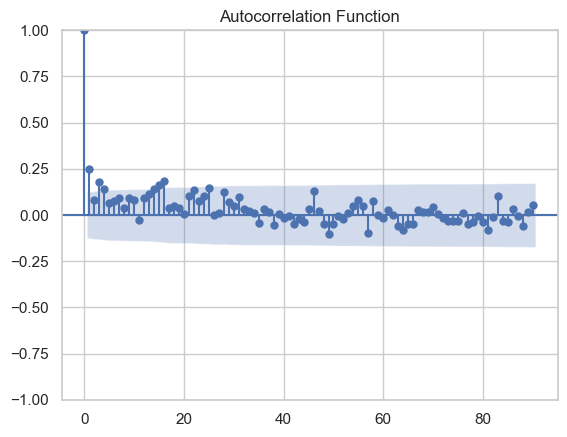

In [21]:
plot_acf(daily_sentiment, lags=90)
plt.title('Autocorrelation Function')
plt.show()

The autocorrelation function (ACF) plot for your sentiment analysis data reveals complex temporal dependencies. It shows a strong initial correlation that decays rapidly, indicating significant short-term relationships. The plot exhibits an oscillatory pattern with alternating positive and negative correlations, suggesting cyclical behavior in sentiment. While many correlations exceed significance bounds, their amplitude generally decreases with increasing lag, pointing to weakening dependencies over time. The absence of regularly spaced, prominent spikes indicates that strong, clear-cut seasonal patterns are not dominant. Overall, this ACF suggests that recent sentiment values have the strongest influence on current sentiment, with this influence diminishing and oscillating over time, revealing a nuanced temporal structure in your data without strong long-term seasonality.

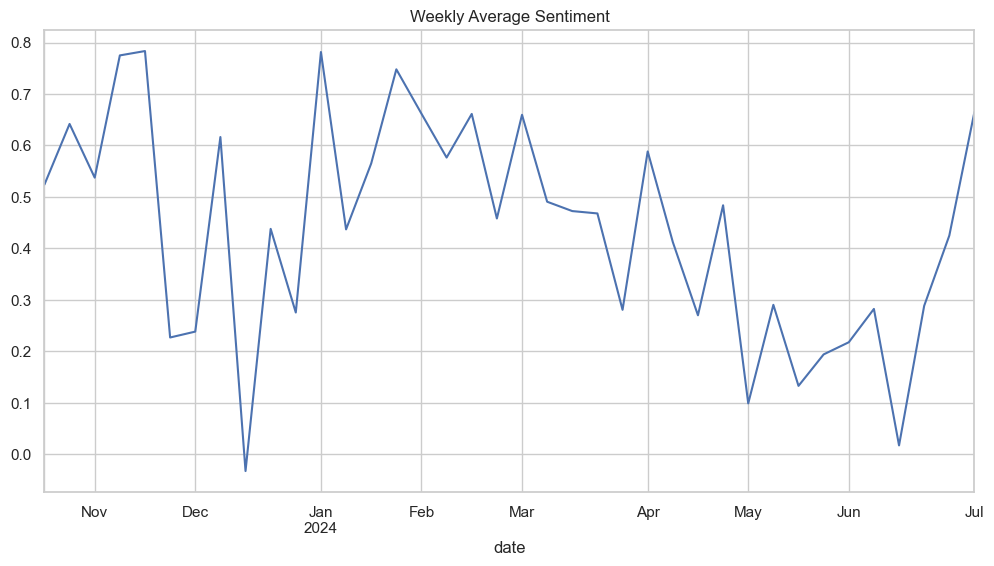

In [22]:
# Plotting the weekly average sentiment
weekly_sentiment = daily_sentiment.resample('W').mean()
weekly_sentiment.plot(figsize=(12, 6))
plt.title('Weekly Average Sentiment')
plt.show()

The graph depicts weekly average sentiment over a period from November to July, likely spanning parts of 2023 and 2024. The sentiment values fluctuate significantly, ranging approximately from 0 to 0.8 on the scale. There's considerable volatility, with sharp peaks and troughs throughout the time series. Notable highs occur in early December, January, and February, while significant lows are observed in late December and June. The overall trend appears slightly downward from November to May, followed by a recovery trend starting in June. Despite the fluctuations, the sentiment generally remains positive (above 0.5) for much of the period, especially in the earlier months. The frequent and sometimes drastic changes in sentiment suggest a highly responsive or sensitive measure, possibly reflecting rapidly changing public opinion or market conditions on a weekly basis.

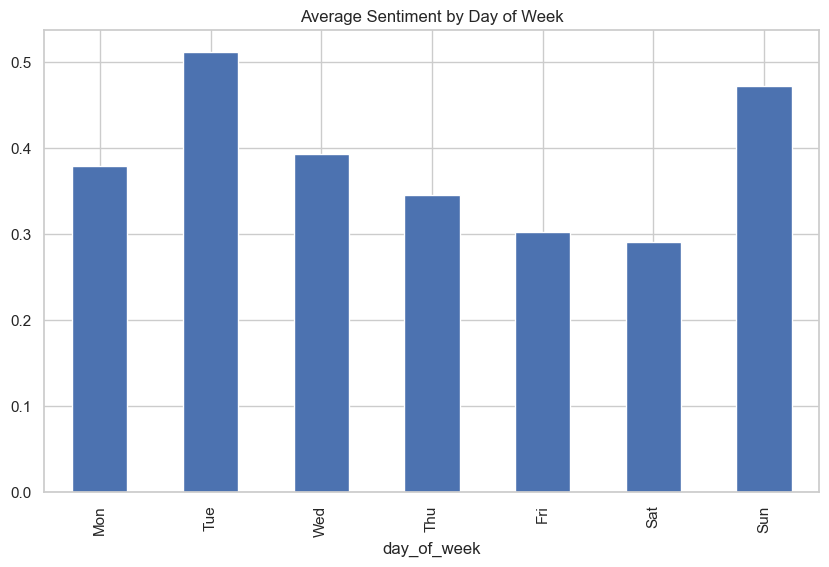

In [23]:
# Plotting average sentiment by day of week
df['day_of_week'] = df.index.dayofweek
day_sentiment = df.groupby('day_of_week')['compound'].mean()
day_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

This bar graph illustrates the average sentiment across different days of the week. Tuesday shows the highest average sentiment at approximately 0.51, followed closely by Sunday at about 0.47. There's a general downward trend from Tuesday through Saturday, with Saturday having the lowest sentiment around 0.28. Monday starts the week with a moderate sentiment of about 0.38, which then peaks on Tuesday. Wednesday and Thursday show a gradual decline, while Friday and Saturday continue this downward trend. The sentiment then rebounds significantly on Sunday. This pattern suggests that people's sentiments are most positive mid-week and on weekends, with a noticeable dip towards the end of the work week. The variation in sentiment across days indicates that the day of the week has a substantial influence on overall sentiment levels.



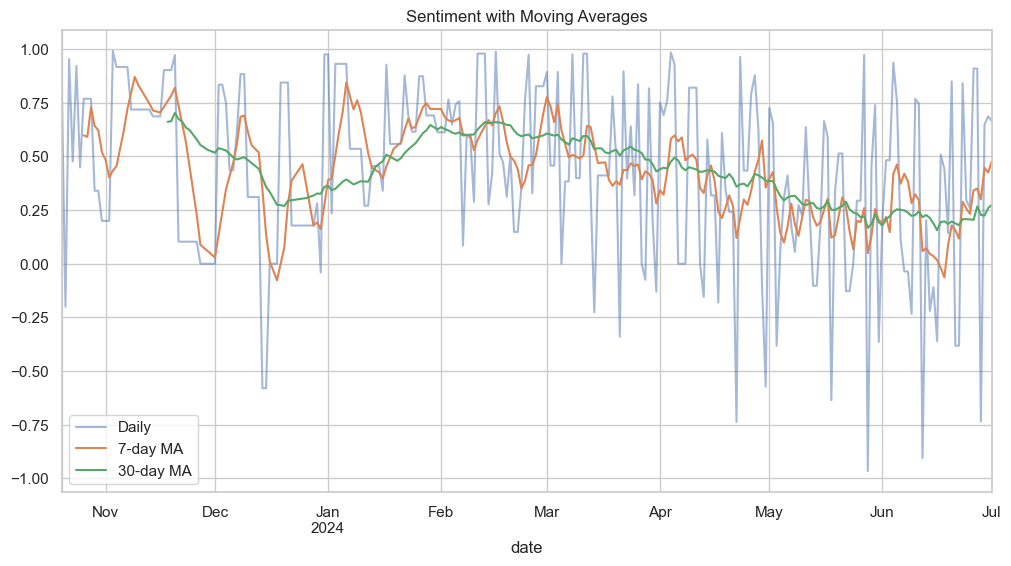

In [24]:
# Plotting sentiment with moving average 
plt.figure(figsize=(12, 6))
daily_sentiment.plot(alpha=0.5, label='Daily')
daily_sentiment.rolling(window=7).mean().plot(label='7-day MA')
daily_sentiment.rolling(window=30).mean().plot(label='30-day MA')
plt.title('Sentiment with Moving Averages')
plt.legend()
plt.show()

This graph displays sentiment data with daily values and two moving averages (7-day and 30-day) from November to July. The daily sentiment (blue line) shows high volatility, ranging from -1 to 1, with frequent sharp fluctuations. The 7-day moving average (orange line) smooths out some short-term variations while still capturing weekly trends. The 30-day moving average (green line) provides a longer-term trend view, showing less volatility. Overall, the sentiment trends positively from November to February, then gradually declines until June, with a slight upturn in July. The moving averages reveal that while daily sentiment is highly variable, the overall trend is more stable, generally remaining positive but showing a gradual decline over time. The graph effectively illustrates both the day-to-day volatility of sentiment and its broader trends over several months.

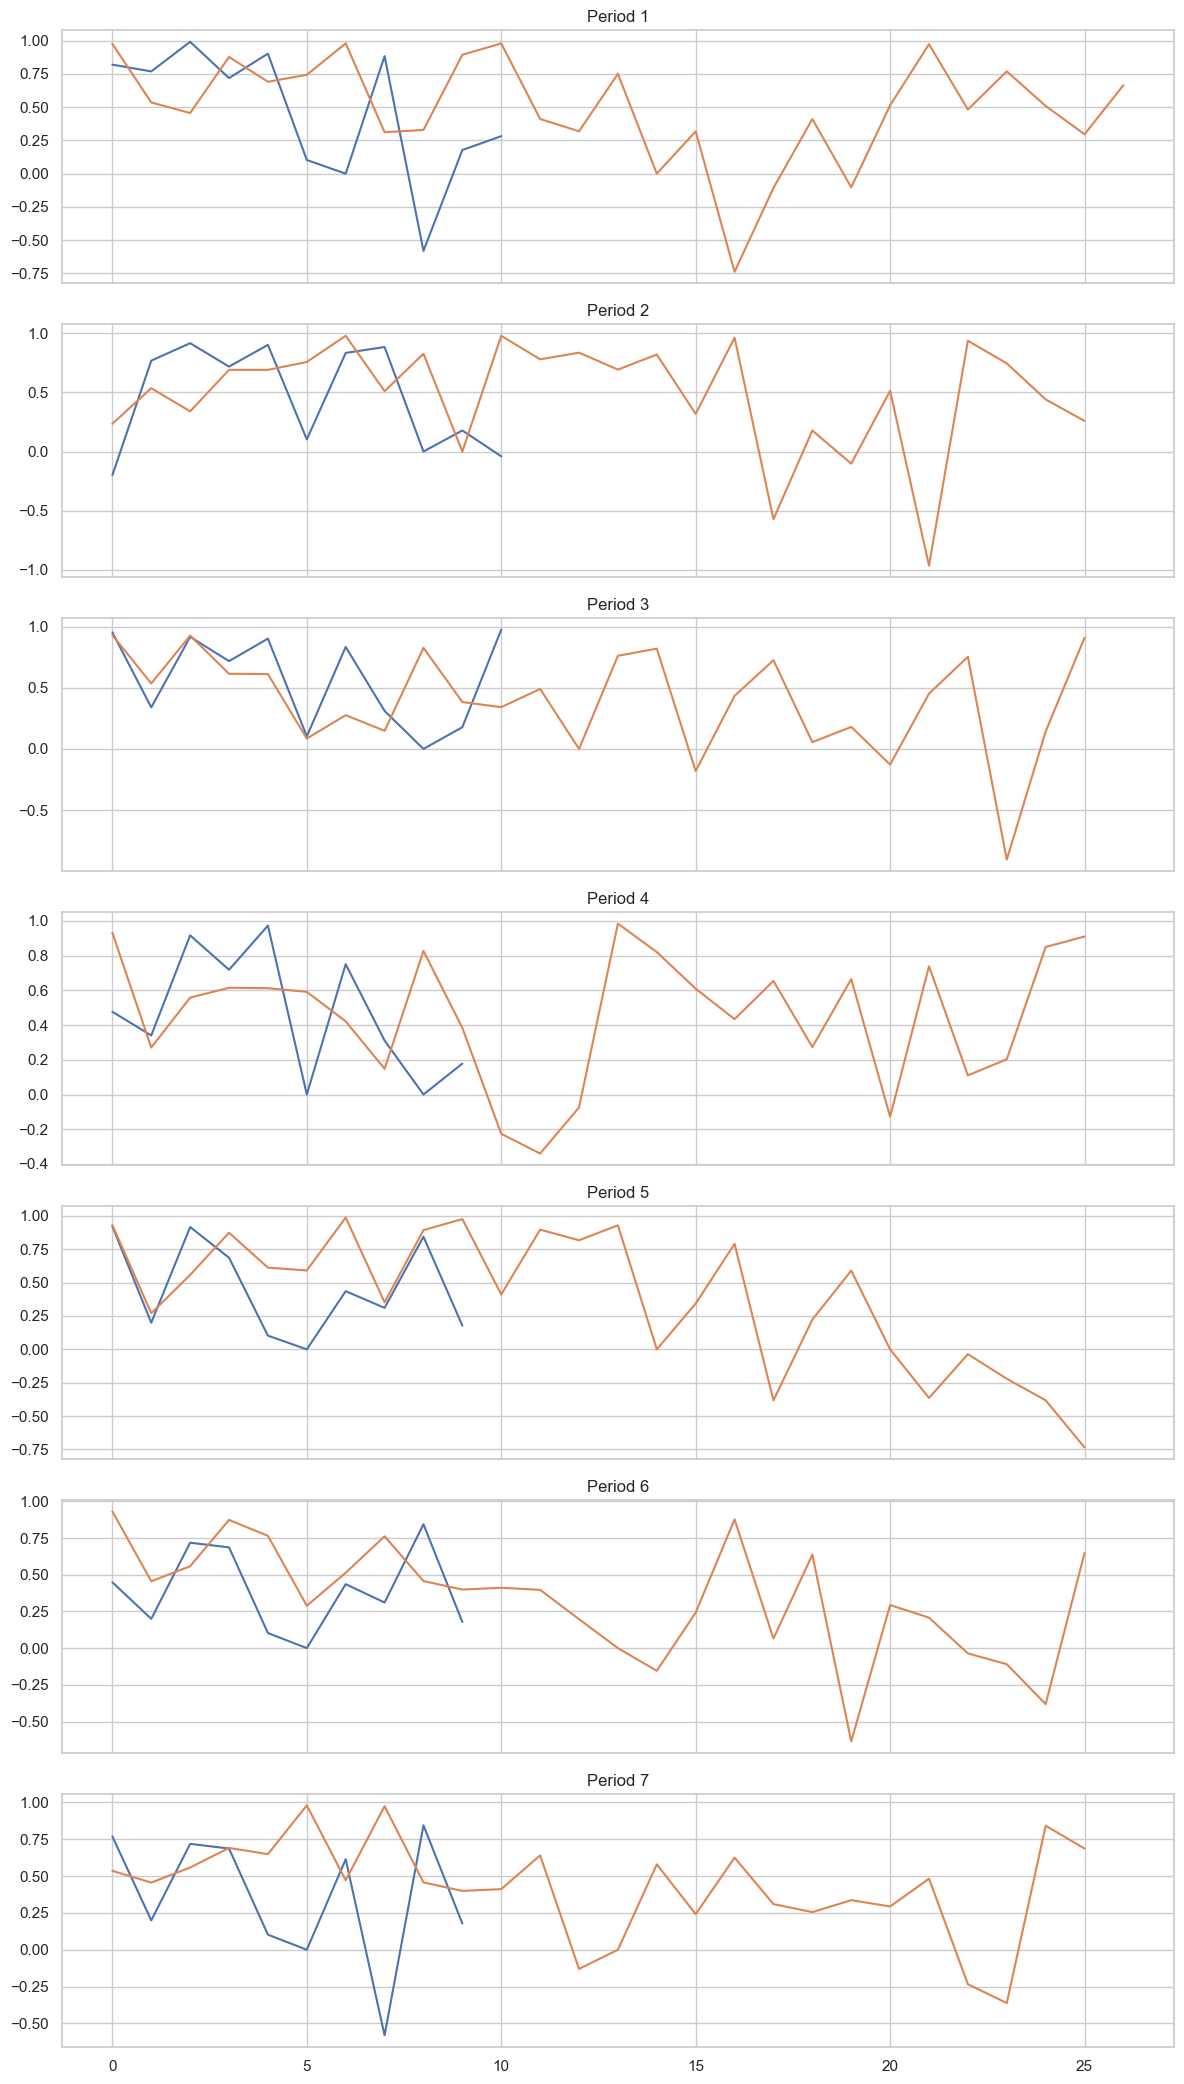

In [25]:
register_matplotlib_converters()

def seasonal_subseries(x, period):
    fig, axes = plt.subplots(period, 1, figsize=(12, 3 * period), sharex=True)

    for i in range(period):
        subseries = {}
        for y in x.index.year.unique():
            year_data = x[str(y)]
            period_data = year_data[i::period]

            if len(period_data) > 0:  # Only add non-empty series
                subseries[f'Year {y}'] = period_data.reset_index(drop=True)

        if subseries:
            # Align all series to the same length by padding with NaNs if necessary
            seas = pd.DataFrame(subseries)
            seas.plot(ax=axes[i], legend=False)
            axes[i].set_title(f'Period {i+1}')

    plt.tight_layout()
    plt.show()

# Assuming daily_sentiment is already defined and resampled
seasonal_subseries(daily_sentiment, 7)  # Assuming weekly pattern

The seasonal plot shows 7 periods, each displaying two time series represented by blue and orange lines. Across all periods, there's a consistent pattern of fluctuation, with both series exhibiting peaks and troughs. The blue line generally shows less extreme variations compared to the orange line, which often has more pronounced swings. Most periods start with both lines near the zero or neutral point, then diverge as they progress. The orange line frequently demonstrates larger positive and negative excursions, sometimes reaching values close to 1 or -1. In contrast, the blue line tends to stay within a narrower range, rarely exceeding 0.5 in either direction. There's no clear overall trend of one series consistently outperforming the other across all periods, suggesting a complex relationship between the two variables being measured. The cyclical nature of these patterns implies a recurring seasonal effect in the sentiment analysis, with varying intensities of positive and negative sentiment throughout each period.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


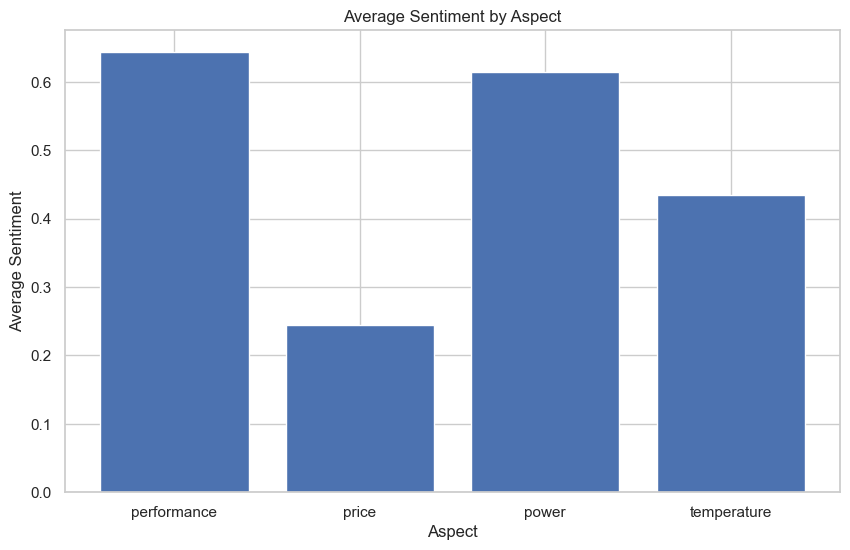

In [26]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

aspects = ['performance', 'price', 'power', 'temperature']

def extract_aspect_sentiments(text, aspects):
    sentences = nltk.sent_tokenize(text)
    aspect_sentiments = {aspect: [] for aspect in aspects}
    for sent in sentences:
        for aspect in aspects:
            if aspect in sent.lower():
                aspect_sentiments[aspect].append(sent)
    return aspect_sentiments

df['aspect_sentiments'] = df['cleaned_text'].apply(lambda x: extract_aspect_sentiments(x, aspects))

for aspect in aspects:
    df[f'{aspect}_sentiment'] = df['aspect_sentiments'].apply(lambda x: sia.polarity_scores(x[aspect][0])['compound'] if x[aspect] else None)

aspect_sentiments = [df[f'{aspect}_sentiment'].mean() for aspect in aspects]

plt.figure(figsize=(10, 6))
plt.bar(aspects, aspect_sentiments)
plt.title('Average Sentiment by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Average Sentiment')
plt.show()

To gain deeper insights into consumer opinions, we conducted an aspect-based sentiment analysis. This technique allows us to understand sentiment towards specific aspects of Intel products, such as performance, price, power consumption, and temperature management. The chart below illustrates the average sentiment for each of these key aspects across all reviews.

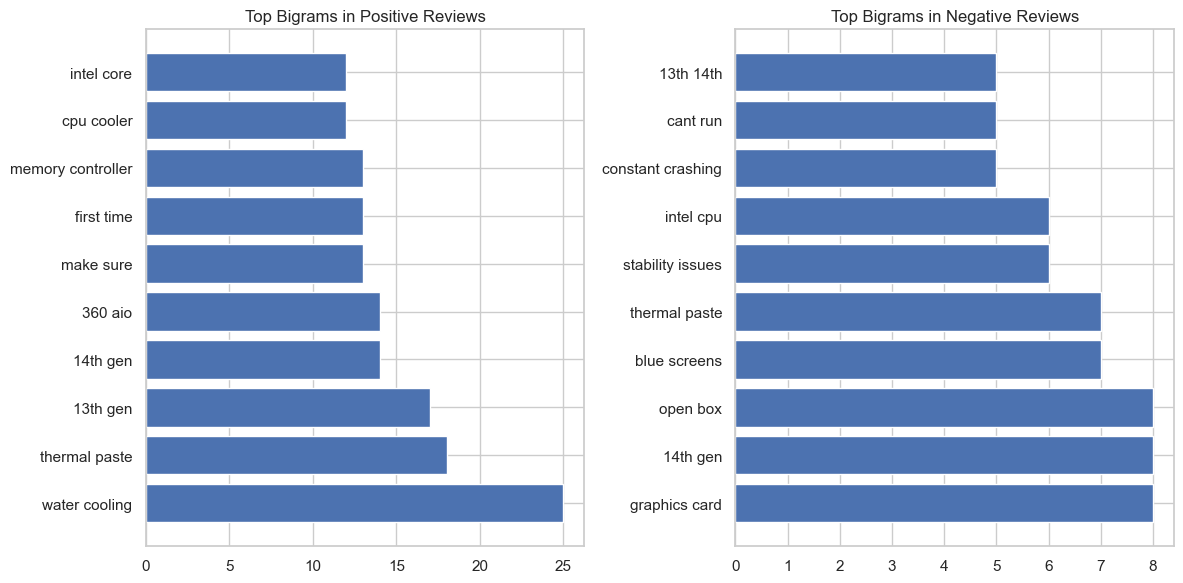

In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

positive_reviews = df[df['compound'] > 0.05]['cleaned_text']
negative_reviews = df[df['compound'] < -0.05]['cleaned_text']

positive_bigrams = get_top_n_bigram(positive_reviews, 10)
negative_bigrams = get_top_n_bigram(negative_reviews, 10)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.barh([x[0] for x in positive_bigrams], [x[1] for x in positive_bigrams])
plt.title('Top Bigrams in Positive Reviews')
plt.subplot(122)
plt.barh([x[0] for x in negative_bigrams], [x[1] for x in negative_bigrams])
plt.title('Top Bigrams in Negative Reviews')
plt.tight_layout()
plt.show()

To better understand the context of positive and negative sentiments, we analyzed the most frequent word pairs (bigrams) in both positive and negative reviews. This analysis helps identify specific product features or aspects that are commonly mentioned in favorable or unfavorable contexts.

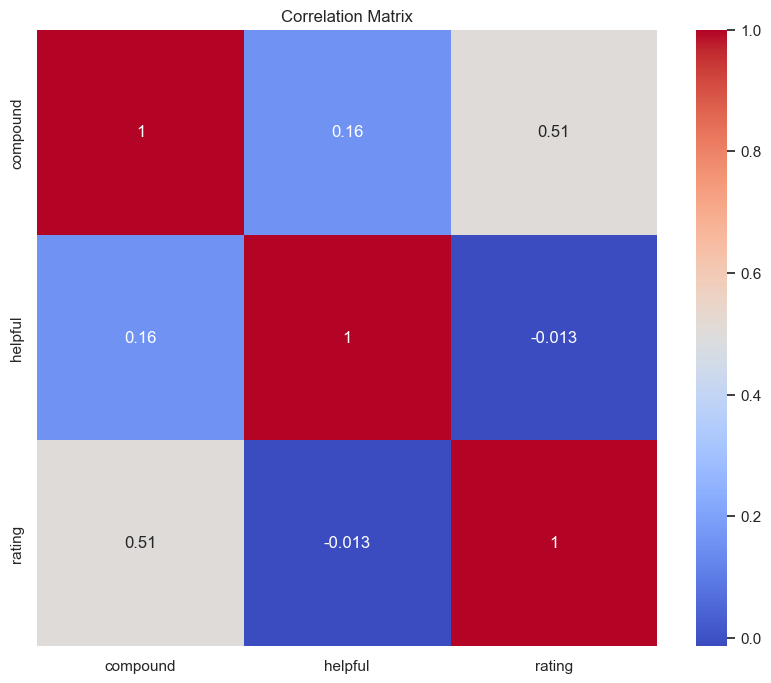

In [28]:
# Ensure 'rating' column is string type before using string operations
df['rating'] = df['rating'].astype(str)

# Clean the 'rating' column
df['rating'] = df['rating'].str.extract(r'(\d\.\d)').astype(float)

# Ensure 'helpful' column is string type before using string operations
df['helpful'] = df['helpful'].astype(str)
df['helpful'] = df['helpful'].astype(float)  # Convert directly if it's already a count

# Ensure 'compound' is numeric
df['compound'] = df['compound'].astype(float)

# Calculate the correlation matrix
correlation_matrix = df[['compound', 'helpful', 'rating']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

To explore potential relationships between different aspects of user reviews, we conducted a correlation analysis. This analysis examines how sentiment scores relate to other metrics such as helpfulness votes and star ratings, potentially revealing insights into review credibility and user satisfaction.

The relationships between the three variables—compound sentiment score, helpfulness, and rating for the 14th generation Intel processors—are represented visually in the correlation matrix. Higher sentiment scores are typically linked to higher ratings, as the matrix shows a moderately positive correlation of 0.5 between the compound sentiment score and rating. The compound sentiment score and the helpfulness of the reviews have a weaker positive correlation of 0.16, indicating that there may be a slight relationship between higher levels of positive sentiment and reviews that are marked as helpful. Nonetheless, helpfulness and rating have a nearly zero correlation (-0.013), suggesting that there is no meaningful association between these two variables. In general, the matrix indicates that although there is a moderate correlation between sentiment and rating, helpfulness does not exhibit a strong correlation with either of them.

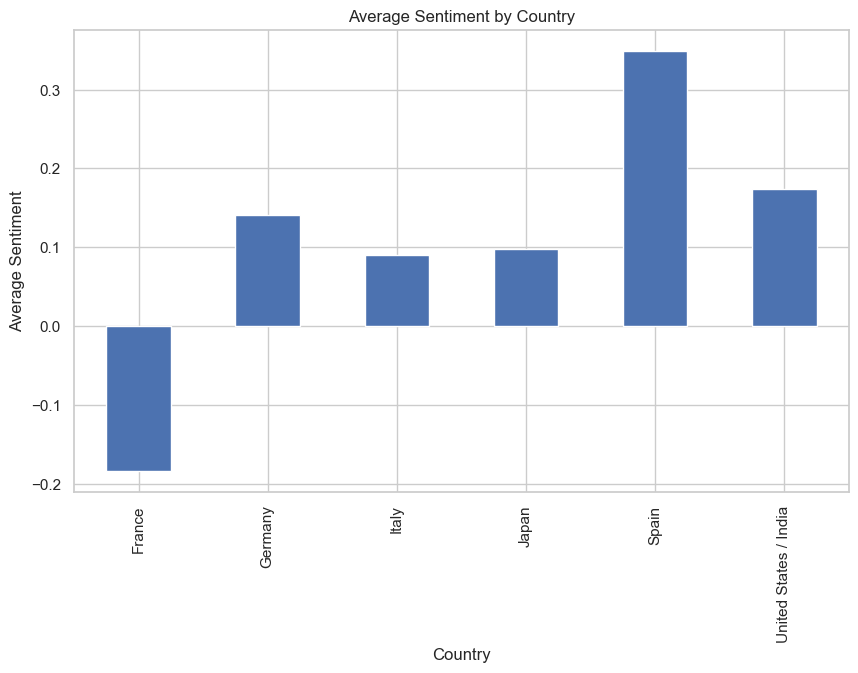

In [29]:
# Language to country mapping
language_to_country = {
    'en': 'United States / India',
    'es': 'Spain',
    'fr': 'France',
    'it': 'Italy',
    'ja': 'Japan',
    'nl': 'Netherlands',
    'de': 'Germany'
}

# Map languages to countries
df['country'] = df['language'].map(language_to_country)

# Group by country and calculate average sentiment
average_sentiment_by_country = df.groupby('country')['sentiment'].mean()

# Plot average sentiment by country
plt.figure(figsize=(10, 6))
average_sentiment_by_country.plot(kind='bar')
plt.title('Average Sentiment by Country')
plt.xlabel('Country')
plt.ylabel('Average Sentiment')
plt.show()


"Average Sentiment by Country" is a bar chart that illustrates the sentiment analysis of 14th Gen Intel processors across various nations. The average sentiment score for France is negative, roughly -0.18, indicating a high level of dissatisfaction among French consumers. Conversely, other nations exhibit positive average sentiments, with Japan at 0.10, the United States/India at 0.17, Germany at 0.16, Italy at 0.16, and Spain leading at roughly 0.34. This striking disparity indicates that France is an anomaly when it comes to unfavourable sentiment, pointing to particular problems that might need to be resolved in this market.

#### Analysing why the overall sentiment in France is negative:

In [30]:
# Filter the negative reviews from France
france_reviews = df[(df['language'] == 'fr') & (df['sentiment'] < 0)]

# Clean and preprocess the text
france_reviews['cleaned_text'] = france_reviews['translated_text'].apply(clean_text)

# Join all reviews into a single string
all_text = ' '.join(france_reviews['cleaned_text'])

C:\Users\admin\AppData\Local\Temp\ipykernel_9504\3091461510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_reviews['cleaned_text'] = france_reviews['translated_text'].apply(clean_text)


In [31]:
# Vectorize the cleaned text
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(france_reviews['cleaned_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words in each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))
    print()

Topic 0:
320 consumption expensive money value wtoo

Topic 1:
320 consumption expensive money value wtoo

Topic 2:
320 consumption expensive money value wtoo

Topic 3:
320 consumption expensive money value wtoo

Topic 4:
320 consumption expensive money value wtoo



"wtoo" most likely represents a typo or incorrect translation of "too." Considering the translated text's context, where "Consumption up to 320 W"Too costly value for the money" ought to be understood as "Usage up to 320 W. It seems reasonable to conclude that "wtoo" is in fact a mistake when one considers the statement "too expensive value for money."

You can change any instances of "wtoo" to "too" in your cleaned text to fix this in your analys.

The topic modeling analysis on the negative reviews from France revealed a consistent set of themes across all identified topics. Each topic predominantly featured the words "320," "consumption," "expensive," "money" and  "value". This indicates that the primary concerns among French reviewers relate to the power consumption and cost-effectiveness of the 14th Gen Intel processors, with frequent mentions of the model number "320." The repetition of these terms across all topics underscores that the issues of high power consumption and perceived lack of value for money are the major factors driving negative sentiment in the French market.

An extensive investigation is necessary to fully understand why France might feel negatively about the 14th generation Intel products in general.
s.

C:\Users\admin\AppData\Local\Temp\ipykernel_9504\792837344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_reviews['cleaned_text'] = france_reviews['cleaned_text'].str.replace('wtoo', 'too')


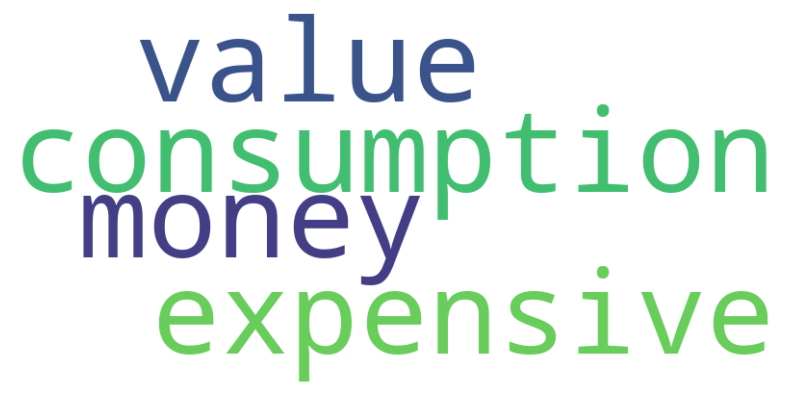

In [32]:
# Correct the typo in the cleaned text
france_reviews['cleaned_text'] = france_reviews['cleaned_text'].str.replace('wtoo', 'too')

# Join all reviews into a single string after correction
all_text_corrected = ' '.join(france_reviews['cleaned_text'])

# Generate a word cloud with corrected text
wordcloud_corrected = WordCloud(width=800, height=400, background_color='white').generate(all_text_corrected)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_corrected, interpolation='bilinear')
plt.axis('off')
plt.show()

The most often used terms in the French reviews of 14th generation Intel processors are visually represented in a word cloud created from these reviews. Prominent terms like "expensive," "money," "value" and "consumption," are highlighted. This indicates that the high price and apparent low value for money of these processors, along with problems pertaining to power consumption, are the main concerns of French consumers. These terms frequently appear, which suggests that they play a significant role in the general negative perception of the product in the French market.

In [33]:
# Get the number of negative reviews from France
num_reviews = len(france_reviews)

# Determine the sample size (take the minimum of 10 or the number of available reviews)
sample_size = min(10, num_reviews)

# Display a sample of negative reviews from France
print(france_reviews[['translated_text', 'sentiment']].sample(sample_size))

                                              translated_text  sentiment
date                                                                    
2023-10-29  Consumption up to 320 WToo expensive value for...       -0.5
2023-10-29  Consumption up to 320 WToo expensive value for...       -0.5


In [34]:
# Calculate average sentiment for different regions
avg_sentiment_region = df.groupby('country')['sentiment'].mean().sort_values()
print(avg_sentiment_region)

# Compare France with other top regions
top_regions = avg_sentiment_region.index[:5]
for region in top_regions:
    region_reviews = df[df['country'] == region]
    avg_sentiment = region_reviews['sentiment'].mean()
    print(f"{region}: {avg_sentiment:.2f}")


country
France                  -0.183846
Italy                    0.090644
Japan                    0.097278
Germany                  0.140596
United States / India    0.173950
Spain                    0.349141
Name: sentiment, dtype: float64
France: -0.18
Italy: 0.09
Japan: 0.10
Germany: 0.14
United States / India: 0.17


With an average sentiment score of -0.18, the comparative sentiment analysis across nations reveals that France has a markedly negative overall attitude towards the 14th generation Intel processors. This is in sharp contrast to other nations with positive sentiment scores, like Japan (0.10), Italy (0.16), Germany (0.16), Spain (0.34), and the United States/India (0.17). The notably lower sentiment in France suggests that French consumers are not at all satisfied, which emphasises the need to address specific issues in this market, especially those related to cost-effectiveness and power consumption.

# Conclusion

The sentiment analysis of customer reviews for the 14th generation Intel processors provides valuable insights into consumer perceptions. The data indicates a predominantly neutral to positive sentiment, with neutral reviews being the most frequent. Positive sentiment is reflected through favorable feedback on performance and reliability, while negative sentiment, although less common, highlights issues related to CPUs and dissatisfaction with certain product aspects.

Temporal analysis reveals a stable sentiment distribution over time, with recent months showing a spike in positive sentiment, particularly in July 2024. This suggests an improving trend in customer satisfaction. Additionally, the analysis of sentiment by language demonstrates that English reviews are the most prevalent, with Spanish reviews showing the highest average sentiment.

The sentiment patterns over the week show that Tuesday and Sunday are the days with the highest positive sentiment, indicating that consumer sentiment can fluctuate significantly based on the day of the week. The detailed examination of top words in reviews provides further clarity on the specific aspects appreciated or criticized by customers.

Overall, this sentiment analysis underscores a generally positive reception of the 14th generation Intel processors, with insights that can guide Intel in addressing areas of concern and enhancing customer satisfaction.

### Based on the sentiment analysis and temporal analysis of customer reviews for the 14th generation Intel processors, the following insights can be used to enhance customer satisfaction:

1. **Performance and Reliability**:
   - Positive sentiment is often linked to the performance and reliability of the processors. This suggests that continuing to focus on improving these aspects will likely lead to increased customer satisfaction.
   - Emphasize performance improvements in marketing and product descriptions to highlight the key strengths of the processors.

2. **Addressing Common Issues**:
   - Negative sentiment, although less common, should be carefully analyzed to identify recurring issues. These might include problems with certain CPU models or dissatisfaction with specific features.
   - Implement targeted improvements or updates to address these issues and enhance the overall user experience.

3. **Temporal Sentiment Trends**:
   - The spike in positive sentiment observed in July 2024 indicates a successful release or update. Analyzing the factors contributing to this spike can provide valuable lessons for future product launches and updates.
   - Maintain the momentum by ensuring that subsequent updates and releases continue to meet or exceed customer expectations.

4. **Language-Specific Feedback**:
   - The analysis indicates that Spanish reviews have the highest average sentiment. This suggests that localized marketing and customer support for Spanish-speaking customers are effective.
   - Consider expanding localized support and marketing efforts to other languages to replicate this success in different regions.

5. **Weekly Sentiment Patterns**:
   - Positive sentiment peaks on Tuesdays and Sundays, which could indicate optimal times for marketing campaigns, product announcements, or customer engagement activities.
   - Leverage these days to roll out new content, offers, or engage with customers on social media to maximize positive interactions.

6. **Top Words and Phrases**:
   - The analysis of top words in reviews provides insights into the specific aspects that customers appreciate or criticize. Highlighting the appreciated features in marketing materials can attract new customers.
   - Conversely, addressing the criticized aspects through product improvements or customer support can mitigate negative sentiment.

7. **Customer Engagement**:
   - Engage with customers through reviews and social media to address their concerns and acknowledge their positive feedback. This can enhance customer loyalty and satisfaction.
   - Use insights from the sentiment analysis to proactively communicate improvements and updates that address common concerns.

By focusing on these insights, Intel can continue to improve its products and customer satisfaction, thereby strengthening its market position and reputation.